# 미분

In [207]:
import numpy as np

# 나쁜 미분의 구현
# 함수 f(x)에서, x가 아주 작은 수인 h만큼 변경되었을 때의 변화량을 구하는 것
# 즉 h에 대한 평균 변화량
def numerical_diff(f, x):
  h = 10e-50
  return (f(x+h) - f(x)) / h

In [208]:
print(np.float32(1e-50))  # 너무 작아서 컴퓨터 시스템에서는 그냥 0으로 표현

0.0


In [209]:
def numerical_diff(f, x):
  h = 1e-4  # 0.0001
  return (f(x+h) - f(x-h)) / (2*h)

$\frac{ df(x) }{ dx }  =  \lim_{h\to 0} \frac{f(x+h) - f(x)}{ h }$


$y = 0.01x^2 + 0.1x$

In [210]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

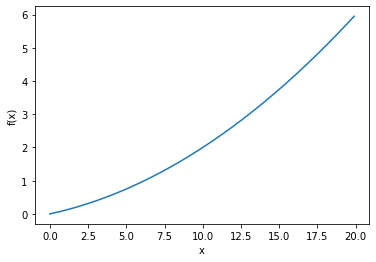

In [211]:
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열을 생성
y = function_1(x)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [212]:
print('x가 5일 때 미분값 : {}'.format(numerical_diff(function_1, 5)))
print('x가 10일 때 미분값 : {}'.format(numerical_diff(function_1, 10)))

x가 5일 때 미분값 : 0.1999999999990898
x가 10일 때 미분값 : 0.2999999999986347


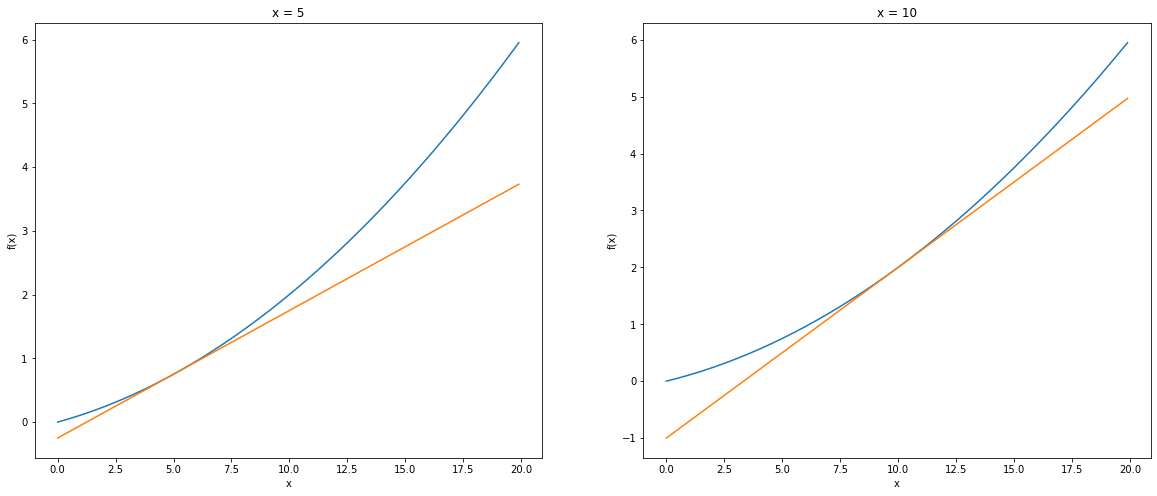

In [213]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y

fig, axes = plt.subplots(1,2, figsize=(20,8))

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
axes[0].set_xlabel("x")
axes[0].set_ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

axes[0].plot(x, y)
axes[0].plot(x, y2)
axes[0].set_title("x = 5")

axes[1].set_xlabel("x")
axes[1].set_ylabel("f(x)")

tf = tangent_line(function_1, 10)
y2 = tf(x)

axes[1].plot(x, y)
axes[1].plot(x, y2)
axes[1].set_title("x = 10")
plt.show()

# 편미분

$f(x_0, x_1) = x^2_0 + x^2_1$

In [214]:
# x0 = 3, x1 = 4일 때 함수 f에 대한 x0의 편미분 구하기
# x1을 4로 대입했을 때의 x0의 미분값을 구하는 것과 동일하다.

def func_1(x0):
  return x0 ** 2 + 4.0 ** 2
print(numerical_diff(func_1, 3.0))

6.00000000000378


$x_0=7, x_1=3$일 때 $\frac{\partial f}{\partial x_1}$의 편미분값

In [215]:
def func_2(x1):
  return 7 ** 2 + x1 ** 2
print(numerical_diff(func_2, 3.0))

5.9999999999860165


In [216]:
def numerical_gradient(f, x):  # 함수, 1차원 배열
  h = 1e-4 # 0.0001
  grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

  # 기울기 벡터를 저장할 배열 생성하기(변수의 갯수만큼 원소를 가질 수 있도록)
  # 각 변수에 대한 미분값 구하기
  for idx in range(x.size):  # x 배열의 크기만큼 0으로 채워진 배열 만들기
      tmp_val = x[idx]
      
      # f(x+h) 계산
      x[idx] = float(tmp_val) + h
      fxh1 = f(x)
      
      # f(x-h) 계산
      x[idx] = tmp_val - h 
      fxh2 = f(x) 
      

      # 각 편미분의 기울기를 저장
      # ex) x0에 대한 편미분을 구하고 해당 기울기를 해당 인덱스에 저장
      #     x1에 대한 편미분을 구하고 해당 기울기를 해당 인덱스에 저장
      grad[idx] = (fxh1 - fxh2) / (2*h)
      x[idx] = tmp_val # 값 복원
    
  return grad

In [217]:
def function_2(x):
  return x[0] ** 2 + x[1] ** 2

In [218]:
result = numerical_gradient(function_2, np.array([3.0, 4.0]))
print("x = [3, 4] 일 때의 기울기 배열 : {}".format(result))

result = numerical_gradient(function_2, np.array([0.0, 2.0]))
print("x = [0, 2] 일 때의 기울기 배열 : {}".format(result))

result = numerical_gradient(function_2, np.array([3.0, 0.0]))
print("x = [3, 0] 일 때의 기울기 배열 : {}".format(result))

x = [3, 4] 일 때의 기울기 배열 : [6. 8.]
x = [0, 2] 일 때의 기울기 배열 : [0. 4.]
x = [3, 0] 일 때의 기울기 배열 : [6. 0.]


In [219]:
# 어느 시점에서 최저점으로 내려가는 방향, 크기를 체크

# 경사하강법 구현하기

In [220]:
'''
f : 대상 함수
init_x : 시작 지점
lr : 학습률(learning rate)
step_num : 학습 횟수(경사하강법을 진행할 횟수)
'''
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x

  for i in range(step_num):
    # 각 변수마다 x에서의 기울기(편미분값)를 구한다.
    grad = numerical_gradient(f, x)
    
    # 경사하강법을 이용해서 x를 update한다.
    x -= lr * grad
    
  return x

In [221]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
print("최솟값 탐색 결과 : {}".format(gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)))

최솟값 탐색 결과 : [-6.11110793e-10  8.14814391e-10]


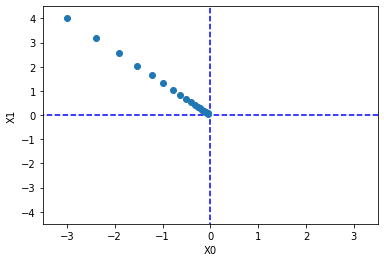

In [222]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

# 학습률에 대한 결과 확인하기

In [223]:
init_x = np.array([-3.0, 4.0])

result, _ = gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)  # lr이 아까의 100배
print("학습률이 10.0일 때 : {}".format(result))

학습률이 10.0일 때 : [-2.58983747e+13 -1.29524862e+12]


In [224]:
# lr을 너무 큰 값으로 줘서 적절한 지점을 못 찾고 발산해버림

학습률이 너무 크면 최소지점을 찾지 못하고 발산하는 것을 알 수 있다.

In [225]:
init_x = np.array([-3.0, 4.0])
result, _ = gradient_descent(function_2, init_x = init_x, lr=1e-10, step_num = 100)
print("학습률이 1e-10일 때 : {}".format(result))

학습률이 1e-10일 때 : [-2.99999994  3.99999992]


In [226]:
# 제대로 갱신이 안 됨.

학습률이 너무 작으면 값의 갱신이 거의 이뤄지지 않는다.

학습률의 기본값은 거의 0.01을 놓고 사용한다.

In [227]:
%cd common
!unzip common.zip

[Errno 2] No such file or directory: 'common'
/content/common
Archive:  common.zip
replace functions.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: Ay
  inflating: functions.py            
  inflating: gradient.py             
  inflating: layers.py               
  inflating: multi_layer_net.py      
  inflating: multi_layer_net_extend.py  
  inflating: optimizer.py            
  inflating: trainer.py              
  inflating: util.py                 
 extracting: __init__.py             


In [228]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [229]:
class SimpleNet:
  def __init__(self):
    # 신경망의 초기화 과정
    # 최초의 가중치, 편향을 가지고 있어야 함
    # 방법 3가지 존재.
    # 1) 정규분포 랜덤 * 0.01 (일반적인 케이스)  # 0.01을 곱하면 분산이 0.01이 된다.
    # 2) 카이밍 히 초깃값 (He 초깃값)
    # 3) 사비에르 초깃값 (Xavier 초깃값)
    
    # 1번이 잘 갱신 안 될때 2 또는 3 사용
    
    self.W = np.random.randn(2, 3)  # 가중치를 랜덤하게 정규분포로 초기화한다.
    
  
  def predict(self, x):
    return np.dot(x, self.W)
  
  def loss(self, x, t):
    # t : target. 정답, 원핫인코딩이 되어있는 형식이어야 함
    z = self.predict(x)
    y = softmax(z)  # 출력값 구하기 # 출력값의 활성화 함수 : softmax
    
    loss = cross_entropy_error(y, t)  # 예측값, 실제값
    
    return loss

In [230]:
net = SimpleNet()
print("가중치 : {}".format(net.W))

가중치 : [[ 0.14759024 -0.49715396 -1.75449647]
 [ 0.58021417  1.6683791  -0.58716705]]


In [231]:
x = np.array([0.6, 0.9])
p = net.predict(x)

print("예측된 값 : {}".format(p))

예측된 값 : [ 0.6107469   1.20324881 -1.58114823]


In [232]:
print("최댓값의 인덱스 : {}".format(np.argmax(p)))  # 최댓값의 인덱스 확인

최댓값의 인덱스 : 1


In [233]:
t = np.array([1, 0, 0])  # 정답이 0일 때
t_error = np.array([0, 0, 1])  # 정답이 2일 때

print("정답이 0일 때의 LOSS : {}".format(net.loss(x, t)))
print("정답이 2일 때의 LOSS : {}".format(net.loss(x, t_error)))

정답이 0일 때의 LOSS : 1.0716560429333555
정답이 2일 때의 LOSS : 3.263548844677827


In [234]:
# 오답일 때의 LOSS가 훨씬 더 높다.

In [235]:
t = np.array([0, 0, 1])  # 정답이 2일 때 (예측이 틀렸다고 판단.)

def f(W):
  return net.loss(x, t)
# f라는 함수 : 미분 대상이 되는 함수
# 내가 원하는 형식으로 loss를 넣으면 됨
# 함수를 미분 -> loss에 대한 w의 미분

In [236]:
# LOSS를 구하는 함수 f에 대한 모든 W들의 ***기울기*** 구하기
# W의 각 원소에 대해 편미분이 일어난다.

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.20546397  0.37158314 -0.57704711]
 [ 0.30819596  0.5573747  -0.86557066]]


dW의 출력값 : 

```python
[[ 0.29062002  0.20842996 -0.49904998]
 [ 0.43593003  0.31264494 -0.74857498]]
```


- $w_{11}$ 이 아주 작은 값인 h만큼 증가하면 LOSS가 0.29h만큼 증가한다.
- $w_{12}$ 이 h만큼 증가하면 LOSS가 0.44만큼 증가한다.
- $w_{21}$ 이 h만큼 증가하면 LOSS가 0.21만큼 증가한다.
- $w_{31}$ 이 h만큼 증가하면 LOSS가 0.50만큼 감소한다.

6차 방정식을 풀어야 한다.

# MNIST 신경망 구현하기

In [237]:
import sys, os
sys.path.append(os.pardir)

from common.functions import *
from common.gradient import numerical_gradient

In [238]:
'''
TwoLayerNet : 2층 짜리 신경망 - 은닉층 1개, 출력층 1개
- 마음대로 Hidden Unit, Output Size를 조절할 수 있게 만들 것이다.
'''

class TwoLayerNet:
  # 초기화 시 필요한 것들
  # 1. 입력데이터(x)의 size
  #    - n개(x의 갯수)의 입력을 받을 W의 갯수를 파악해야 하기 때문에
  #    - MNIST의 경우에는 28*28개의 입력을 받는다.
  
  # 2. hidden unit의 크기
  # 3. output size
  # 4. 가중치 정규분포 초기화 값 (정규분포 랜덤값에 곱할 값)
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    # weight_init_std : 분산을 주기 위한 값

    # 가중치 초기화
    self.params = {}

    # 1층 매개변수 마련하기
    self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params["b1"] = np.zeros(hidden_size)  # 편향은 1로 채우거나 0으로 채워도 된다.

    # 2층 매개변수 마련하기 - 출력층
    self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)  # output_size를 num_classes라는 파라미터에 넣어서 사용했었음
    self.params["b2"] = np.zeros(output_size)
    

  def predict(self, x):
    W1, W2, b1, b2 = self.params["W1"], self.params["W2"], self.params["b1"], self.params["b2"]
    
    # 1층 계산
    z1 = np.dot(x, W1) + b1
    a1 = sigmoid(z1)

    # 2층 계산 - 출력층
    z2 = np.dot(a1, W2) + b2
    y = softmax(z2)

    return y
  
  def loss(self, x, t):
    # loss를 구하기 위해서는 예측(predict)부터 한다.
    y = self.predict(x)

    return cross_entropy_error(y, t)
  
  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)  # 행에서 제일 높은 값 뽑기
    t = np.argmax(t, axis=1)

    accuracy = np.sum(y==t) / float(x.shape[0])
    return accuracy
  
  # 신경망의 모든 매개변수들에 대한 미분값(기우기) 구하기 - 수치미분을 활용한다.
  def numerical_gradient(self, x, t):
    print("미분 ㄱㄱ")
    loss_W = lambda W : self.loss(x, t)

    # 각 층에서 구해지는 기울기를 저장할 딕셔너리
    grads = {}

    # 1층 매개변수들의 기울기 구하기(LOSS에 대한 W1, b1의 기울기)
    grads["W1"] = numerical_gradient(loss_W, self.params["W1"])
    grads["b1"] = numerical_gradient(loss_W, self.params["b1"])
    # common.gradient의 numerical_gradient 사용하는 것
    # self.numerical_gradient 라고 하면 지금 함수 클래스를 그대로 사용하는 것(재귀)

    # 2층 매개변수들의 기울기 구하기(LOSS에 대한 W1, b1의 기울기)
    grads["W2"] = numerical_gradient(loss_W, self.params["W2"])
    grads["b2"] = numerical_gradient(loss_W, self.params["b2"])

    return grads

In [239]:
input_size = 28 * 28
hidden_size = 100
output_size = 10

net = TwolayerNet(input_size=input_size, hidden_size=hidden_size, output_size=output_size)

In [240]:
net.params["W1"].shape, net.params["W2"].shape

((784, 100), (100, 10))

총 매개변수의 갯수는?
- 1층 : 784 * 100 + 100
- 2층 : 100 * 10 + 10
- 총 : 79510개

In [241]:
# 신경망이 잘 돌아가는지 임의의 데이터를 집어 넣어서 테스트 해보기
x = np.random.rand(100, 784)  # 이미지 100장 미니배치를 임의로 만들었음.
y = net.predict(x)

In [242]:
x.shape, y.shape

((100, 784), (100, 10))

# MNIST 

In [260]:
from tensorflow.keras import datasets
mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [261]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

## 데이터 전처리

In [262]:
from sklearn.preprocessing import OneHotEncoder

y_train_dummy = OneHotEncoder().fit_transform(y_train.reshape(-1,1))
y_train_dummy = y_train_dummy.toarray()

# y_test도 같이 해야 accuracy 같은 것 확인 가능
y_test_dummy = OneHotEncoder().fit_transform(y_test.reshape(-1,1))
y_test_dummy = y_test_dummy.toarray()

In [264]:
y_train_dummy.shape, y_test_dummy.shape
# one-hot encoding 된 상태

((60000, 10), (10000, 10))

In [265]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_train = X_train / 255.0  # 정규화
# X_train : 픽셀값이기 때문에 0~255까지 값을 가짐 -> 값이 너무 큼 -> 정규화 시켜서 0~1의 범위를 갖도록 만들어줌
X_train.shape

(60000, 784)

In [266]:
X_test = X_test.reshape(X_test.shape[0], -1)
X_test = X_test / 255.0
X_test.shape

(10000, 784)

In [267]:
# 이런 작업 pipeline으로 만들면 금방금방 할 수 있음

## 훈련
- 미니 배치 선정
- 반복 횟수 설정
- 학습률 선정

In [268]:
# tqdm notebook : 반복문 작업이 언제끝날지를 시각화해서 보여주는 것
# ex) 웹크롤링할 때 사용

from tqdm import tqdm_notebook

# 반복 횟수 설정
iter_nums = 10000

# 미니배치 획득 과정
train_size = X_train.shape[0]
batch_size = 100

# 학습률 설정
learning_rate = 0.1

network = TwoLayerNet(input_size, hidden_size=100, output_size=10)

for i in tqdm_notebook(range(iter_nums)):
  # 미니 배치 인덱스 선정하기
  batch_mask = np.random.choice(train_size, batch_size)
  
  X_batch = X_train[batch_mask]
  t_batch = y_train_dummy[batch_mask]
  
  # 각 배치 마다의 기울기를 계산
  # network의 numerical_gradient에서 하는 일
  # 1. 예측
  # 2. cross_entropy_error를 이용한 LOSS 구하기
  # 3. 구해진 LOSS값을 이용해 미분을 수행해서 각 층의 매개변수 기울기를 저장
  
  grads = network.numerical_gradient(X_batch, t_batch)
  
  for key in grads.keys():
    # 각 매개변수마다 경사하강법 수행하기
    network.params[key] -= learning_rate * grads[key]
  
  # 갱신된 Loss 확인하기
  loss = network.loss(X_batch, t_batch)
  print("Step {} -> Loss : {}".format(i,loss))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


미분 ㄱㄱ
Step 0 -> Loss : 2.2769717387613375
미분 ㄱㄱ
Step 1 -> Loss : 2.2840761513150767
미분 ㄱㄱ


KeyboardInterrupt: ignored

In [ ]:
X_train.shape

In [ ]:
y_train_dummy[0]